In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('max_columns', 10, 'max_rows', 30, 'display.precision', 4)

In [2]:
prices_name = 'price2802_df'
sentiments_name = 'sent2802_df'

In [3]:
prices = pd.read_csv(f'../cookbook_data/owndata/{prices_name}.csv', index_col=0)
sentiments = pd.read_csv(f'../cookbook_data/owndata/{sentiments_name}.csv', index_col=0)

##### addition functions

In [4]:
def max_streak(s):
    s1 = s.cumsum()
    return s.mul(s1).diff().where(lambda x: x < 0).ffill().add(s1, fill_value=0).max()

In [5]:
# weekly weight loss updates
def find_perc_loss(s):
    ''' calculate percent loss in weight '''
    return (s - s.iloc[0]) / s.iloc[0]


In [6]:
# generic closure to build all of our customized functions
def make_agg_func(func, name, *args, **kwargs):
    def wrapper(x):
        # print(type(x))    # x ~ s: Series performs function
        return func(x, *args, **kwargs)
    wrapper.__name__ = name
    return wrapper

# my_agg1 = make_agg_func(pct_between, 'pct_1_3k', low=1000, high=3000)
# my_agg2 = make_agg_func(pct_between, 'pct_10_30k', 10000, 30000)

In [7]:
def pct_between(s, low, high):
    return s.between(low, high).mean()

In [8]:
def max_deviation(s):
    std_score = (s - s.mean()) / s.std()
    return std_score.abs().max()

In [9]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean()
    std = daily_return.std()

    abs_z_score = abs(daily_return - mean) / std

    pcts = [abs_z_score.lt(i).mean() for i in range(1, 4)]
    for count, pct in enumerate(pcts, 1):
        print(f'{pct:.3f} fall within {count}')

##### end add function

In [10]:
result = prices.copy()

In [11]:
result['Relative_SL'] = result.Short_Distance / result.Long_Distance
result['RelativePrice_SL'] = result.Short_Price / result.Long_Price

In [12]:
result.to_csv('../cookbook_data/owndata/prices_cleandf2802.csv')

# OLD ANALYSIS

In [13]:
# result['RelativePrice_SL'].min()

In [14]:
result['RelativePrice_SL'] = result['RelativePrice_SL'] - result['RelativePrice_SL'].min()

In [15]:
# result

In [16]:
result.sort_values(by='Short_Distance', ascending=False, key=abs).head()

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
XAUUSD,1844.9906,-8005,1947.6712,-2263,1925.040,3.5373,0.0000
GBPJPY,152.6375,-415,154.9002,189,156.790,-2.1958,0.0381
AUDJPY,84.5237,-364,87.0932,107,88.168,-3.4019,0.0232
CHFJPY,124.1065,-359,126.4620,123,127.696,-2.9187,0.0341
USDJPY,115.9335,-327,117.4372,177,119.205,-1.8475,0.0399


In [17]:
result.sort_values(by='Long_Distance', ascending=False, key=abs).head()

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
XAUUSD,1844.9906,-8005,1947.6712,-2263,1925.0400,3.5373,0.0000
EURAUD,1.4938,-3,1.5450,-509,1.4941,0.0059,0.0196
EURNZD,1.6036,18,1.6500,-482,1.6018,-0.0373,0.0246
GBPAUD,1.7836,52,1.8246,-462,1.7784,-0.1126,0.0302
GBPNZD,1.9120,55,1.9526,-461,1.9065,-0.1193,0.0319


In [18]:
result.sort_values(by='Relative_SL', ascending=False, key=abs).head()

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
EURJPY,128.4694,-326,131.3188,41,131.7330,-7.9512,0.0310
AUDUSD,0.7269,-127,0.7417,-21,0.7396,6.0476,0.0328
AUDNZD,1.0649,-71,1.0740,-20,1.0720,3.5500,0.0442
XAUUSD,1844.9906,-8005,1947.6712,-2263,1925.0400,3.5373,0.0000
AUDJPY,84.5237,-364,87.0932,107,88.1680,-3.4019,0.0232


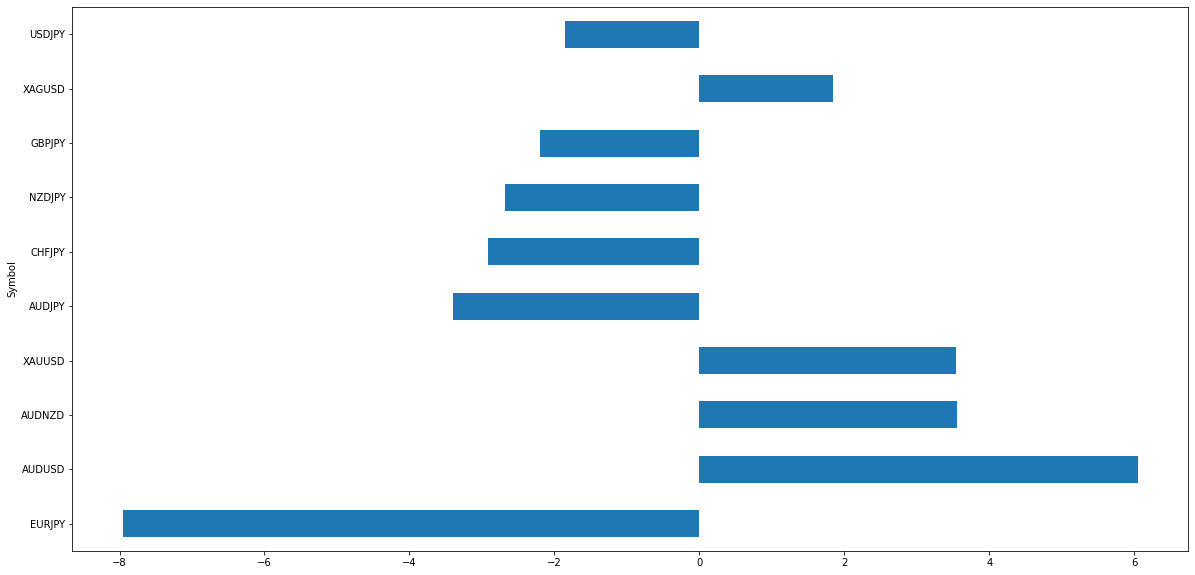

In [19]:
short_hold = result.sort_values(by='Relative_SL', ascending=False, key=abs).head(10)
short_hold.loc[:, 'Relative_SL'].plot(kind='barh')
plt.show()

In [20]:
result.sort_values(by='Relative_SL', ascending=True, key=abs).head()

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
EURUSD,1.1050,-1,1.1280,-229,1.1051,0.0044,0.0323
EURAUD,1.4938,-3,1.5450,-509,1.4941,0.0059,0.0196
EURNZD,1.6036,18,1.6500,-482,1.6018,-0.0373,0.0246
GBPAUD,1.7836,52,1.8246,-462,1.7784,-0.1126,0.0302
GBPNZD,1.9120,55,1.9526,-461,1.9065,-0.1193,0.0319


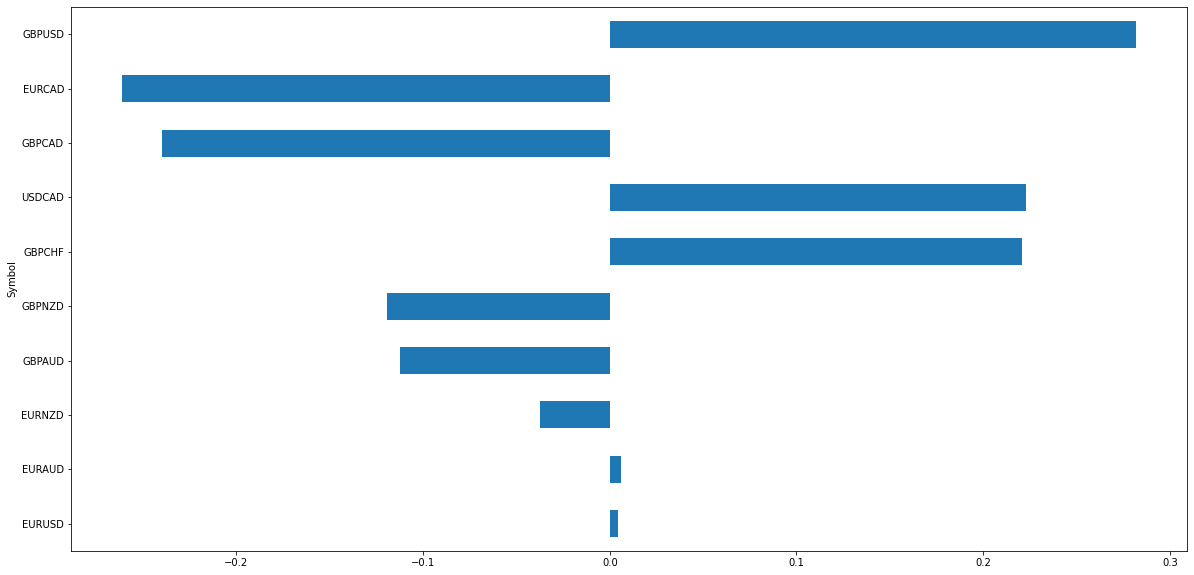

In [21]:
long_hold = result.sort_values(by='Relative_SL', ascending=True, key=abs).head(10)
long_hold.loc[:, 'Relative_SL'].plot(kind='barh')
plt.show()

In [22]:
RelativePrice_SL_df = result.sort_values(by='RelativePrice_SL', ascending=False)

In [23]:
# balance or not balance
RelativePrice_SL_df.head(10)

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
AUDNZD,1.0649,-71,1.0740,-20,1.0720,3.5500,0.0442
USDCHF,0.9281,-54,0.9401,-66,0.9335,0.8182,0.0400
USDJPY,115.9335,-327,117.4372,177,119.2050,-1.8475,0.0399
USDCAD,1.2571,-31,1.2741,-139,1.2602,0.2230,0.0394
GBPJPY,152.6375,-415,154.9002,189,156.7900,-2.1958,0.0381
NZDCAD,0.8621,-72,0.8754,-61,0.8693,1.1803,0.0375
GBPCAD,1.6657,82,1.6917,-342,1.6575,-0.2398,0.0374
AUDCAD,0.9242,-79,0.9393,-72,0.9321,1.0972,0.0366
EURGBP,0.8345,-57,0.8500,-98,0.8402,0.5816,0.0345


<AxesSubplot:ylabel='Symbol'>

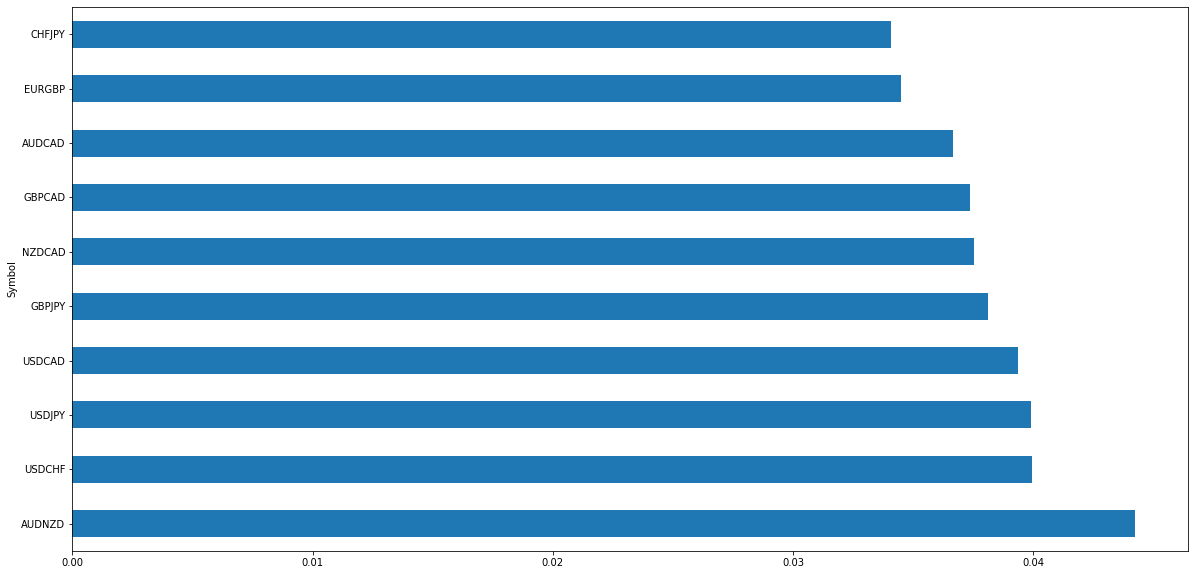

In [24]:
RelativePrice_SL_df.head(10).loc[:, 'RelativePrice_SL'].plot(kind='barh')

In [25]:
RelativePrice_SL_df.tail(10)

,Short_Price,Short_Distance,Long_Price,Long_Distance,Current_Price,Relative_SL,RelativePrice_SL
Symbol,,,,,,,
GBPAUD,1.7836,52,1.8246,-462,1.7784,-0.1126,0.0302
NZDUSD,0.6782,-116,0.6961,-63,0.6898,1.8413,0.0270
NZDCHF,0.6330,-109,0.6503,-64,0.6439,1.7031,0.0261
EURCHF,1.0223,-93,1.0506,-190,1.0316,0.4895,0.0258
EURNZD,1.6036,18,1.6500,-482,1.6018,-0.0373,0.0246
AUDJPY,84.5237,-364,87.0932,107,88.1680,-3.4019,0.0232
AUDCHF,0.6782,-122,0.7007,-103,0.6904,1.1845,0.0206
EURAUD,1.4938,-3,1.5450,-509,1.4941,0.0059,0.0196
XAGUSD,24.2531,-74,25.3949,-40,24.9940,1.8500,0.0078


<AxesSubplot:ylabel='Symbol'>

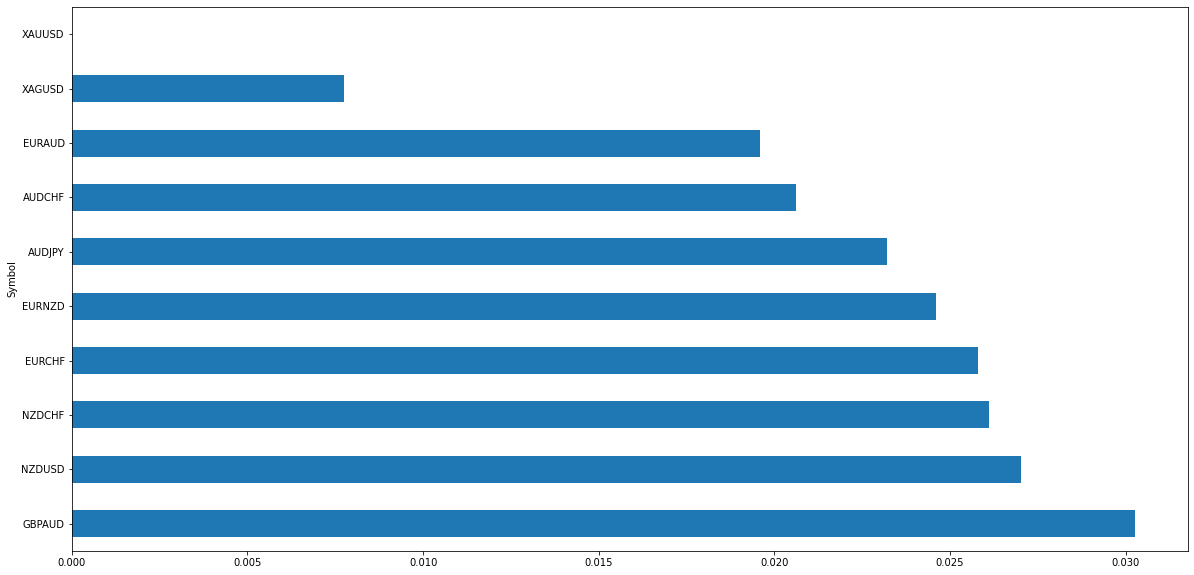

In [26]:
RelativePrice_SL_df.tail(10).loc[:, 'RelativePrice_SL'].plot(kind='barh')

In [27]:
# sorted_result.head()

In [28]:
# sorted_result.tail()

In [29]:
# result.select_dtypes(include=['string'])

In [30]:
# need update current price
# result.filter(items=['Short_Price', 'Long_Price', 'Current_Price']).head()
result.filter(items=['Short_Price', 'Long_Price']).head()

,Short_Price,Long_Price
Symbol,,
XAUUSD,1844.9906,1947.6712
GBPJPY,152.6375,154.9002
AUDJPY,84.5237,87.0932
CHFJPY,124.1065,126.4620
USDJPY,115.9335,117.4372


In [31]:
result.filter(like='Distance').head()

,Short_Distance,Long_Distance
Symbol,,
XAUUSD,-8005,-2263
GBPJPY,-415,189
AUDJPY,-364,107
CHFJPY,-359,123
USDJPY,-327,177


In [32]:
# result.filter(regex='\d').head()
# result.columns

In [33]:
# result.values

In [34]:
# result.count()

In [35]:
# result.min()

In [36]:
# result.max()

In [37]:
# result.describe()

In [38]:
# pd.set_option('max_rows', 20)
# result.describe(percentiles=[.01, .05, .1, .3, .4, .5, .6, .7, .8, .9, .95, .99])

In [39]:
# pd.set_option('max_rows', 10)
# result.isnull().sum()

In [40]:
# result.min(skipna=False)

In [41]:
# result.isnull().sum().sum()

In [42]:
# result.isnull().any()

In [43]:
# result.isnull().dtypes

In [44]:
# result.dtypes
# result.select_dtypes(['int']).fillna('').max()
result.select_dtypes(['int']).fillna('').sort_values(by=['Short_Distance'], ascending=False).tail(10)   # head

,Short_Distance,Long_Distance
Symbol,,
NZDUSD,-116,-63
AUDCHF,-122,-103
AUDUSD,-127,-21
NZDJPY,-268,100
EURJPY,-326,41
USDJPY,-327,177
CHFJPY,-359,123
AUDJPY,-364,107
GBPJPY,-415,189


In [45]:
result.Long_Distance.sort_values(ascending=False).head(10)              

Symbol
GBPJPY    189
USDJPY    177
CHFJPY    123
AUDJPY    107
NZDJPY    100
EURJPY     41
AUDNZD    -20
AUDUSD    -21
XAGUSD    -40
NZDCAD    -61
Name: Long_Distance, dtype: int64

#### update day by day this price

In [46]:
# result

In [47]:
# sentiments = sentiments.apply(pd.to_numeric)

In [48]:
sentiments.dtypes

Action         object
Percentage      int64
Volume        float64
Positions       int64
dtype: object

In [49]:
sentiments.head(10)

,Action,Percentage,Volume,Positions
Symbol,,,,
USDJPY,Short,93,17596.04,30882
EURJPY,Short,93,13211.45,19684
AUDJPY,Short,91,1498.34,6055
NZDJPY,Short,91,2299.32,4954
AUDCHF,Short,91,1513.84,3539
GBPNZD,Long,91,1109.74,4595
USDCAD,Long,89,6880.19,16806
EURNZD,Long,88,1396.85,3428
GBPAUD,Long,88,1657.90,4909


In [50]:
sentiments.tail(10)

,Action,Percentage,Volume,Positions
Symbol,,,,
GBPCAD,Short,13,218.05,638
GBPAUD,Short,12,227.69,1015
EURNZD,Short,12,192.12,711
USDCAD,Short,11,865.04,3921
GBPNZD,Short,9,103.71,543
AUDJPY,Long,9,142.37,719
NZDJPY,Long,9,223.13,625
AUDCHF,Long,9,149.61,1057
EURJPY,Long,7,983.96,3164


## First Example

In [51]:
details = sentiments.copy()

In [52]:
details.sort_values(by=['Percentage'], ascending=False).head(10)

,Action,Percentage,Volume,Positions
Symbol,,,,
USDJPY,Short,93,17596.04,30882
EURJPY,Short,93,13211.45,19684
AUDJPY,Short,91,1498.34,6055
NZDJPY,Short,91,2299.32,4954
AUDCHF,Short,91,1513.84,3539
GBPNZD,Long,91,1109.74,4595
USDCAD,Long,89,6880.19,16806
EURNZD,Long,88,1396.85,3428
GBPAUD,Long,88,1657.90,4909


In [53]:
quote = r'GBP'
quote_filter = details[details.index.str.contains(quote + r'(?!$)')]
quote_filter.dtypes
# quote_filter = quote_filter.apply(pd.to_numeric)

Action         object
Percentage      int64
Volume        float64
Positions       int64
dtype: object

In [54]:
quote_filter.sort_values(by=['Percentage'], ascending=False)

,Action,Percentage,Volume,Positions
Symbol,,,,
GBPNZD,Long,91,1109.74,4595
GBPAUD,Long,88,1657.90,4909
GBPCAD,Long,87,1472.32,5095
GBPJPY,Short,82,1669.82,5758
GBPUSD,Long,77,8642.79,26445
GBPCHF,Long,60,294.85,1602
GBPCHF,Short,40,192.63,675
GBPUSD,Short,23,2620.75,9982
GBPJPY,Long,18,369.72,1698


In [55]:
quote = r'CHF'
quote_filter = details[details.index.str.contains(quote + r'(?!$)')]
quote_filter.dtypes
# quote_filter = quote_filter.apply(pd.to_numeric)

Action         object
Percentage      int64
Volume        float64
Positions       int64
dtype: object

In [56]:
quote_filter.sort_values(by=['Percentage'], ascending=False)

,Action,Percentage,Volume,Positions
Symbol,,,,
CHFJPY,Short,82,1309.11,5364
CHFJPY,Long,18,287.36,597


## More from sentiments

In [57]:
numeric_sentiments = sentiments.iloc[:, 1:4].apply(pd.to_numeric)

In [58]:
result_sentiments = pd.concat([sentiments.Action, numeric_sentiments], axis=1)

In [59]:
result_sentiments
# result_sentiments.to_csv('../cookbook_data/owndata/sentiments_df.csv')

,Action,Percentage,Volume,Positions
Symbol,,,,
USDJPY,Short,93,17596.04,30882
EURJPY,Short,93,13211.45,19684
AUDJPY,Short,91,1498.34,6055
NZDJPY,Short,91,2299.32,4954
AUDCHF,Short,91,1513.84,3539
...,...,...,...,...
AUDJPY,Long,9,142.37,719
NZDJPY,Long,9,223.13,625
AUDCHF,Long,9,149.61,1057


In [60]:
result_sentiments.sort_values(by=['Volume'], ascending=False).head(10)

,Action,Percentage,Volume,Positions
Symbol,,,,
USDJPY,Short,93,17596.04,30882
EURJPY,Short,93,13211.45,19684
EURUSD,Long,63,9604.12,29770
GBPUSD,Long,77,8642.79,26445
USDCAD,Long,89,6880.19,16806
EURUSD,Short,37,5623.86,17238
AUDUSD,Short,84,4094.61,12591
GBPUSD,Short,23,2620.75,9982
NZDJPY,Short,91,2299.32,4954


In [61]:
result_sentiments.sort_values(by=['Positions'], ascending=False).head(10)

,Action,Percentage,Volume,Positions
Symbol,,,,
USDJPY,Short,93,17596.04,30882
EURUSD,Long,63,9604.12,29770
GBPUSD,Long,77,8642.79,26445
EURJPY,Short,93,13211.45,19684
EURUSD,Short,37,5623.86,17238
USDCAD,Long,89,6880.19,16806
AUDUSD,Short,84,4094.61,12591
GBPUSD,Short,23,2620.75,9982
XAUUSD,Long,56,1942.38,9750


#### Sum Positions by Symbol

#### Diff Percentage|Positions|Volume by Symbol

#### Merge Symbols and Actions

#### Compare Volume betwwen Quotes (with same Base): ... 

In [62]:
economic_calendar_1 = pd.read_csv('../cookbook_data/owndata/economic_calendar_1.csv', index_col=1)
economic_calendar_1.drop('id', axis=1, inplace=True)
time_format = '%d/%m/%Y'
economic_calendar_1.index = pd.to_datetime(economic_calendar_1.index, format=time_format)

In [63]:
notnan_economic_filter = economic_calendar_1[economic_calendar_1.currency.notnull()]
# notnan_economic_filter

In [64]:
pd.set_option('max_columns', 20, 'max_rows', 20)

quote_filter = notnan_economic_filter[notnan_economic_filter.currency.str.contains('JPY')]
quote_filter = quote_filter.dropna()

In [65]:
def strip_shit(df, cols=['actual', 'forecast', 'previous']):
    for col in cols:
        df[col] = df[col].map(lambda x: x.rstrip(
            '%').rstrip('T').rstrip('B').rstrip('K').rstrip('M'))
    return df

In [66]:
quote_filter.iloc[:, 5:8] = strip_shit(quote_filter.iloc[:, 5:8].copy())
quote_result_num = quote_filter.iloc[:, 5:8].apply(pd.to_numeric)
quote_results = pd.concat([quote_filter.iloc[:, :5], quote_result_num], axis=1)
quote_results.dtypes

time           object
zone           object
currency       object
importance     object
event          object
actual        float64
forecast      float64
previous      float64
dtype: object

In [67]:
quote_results.select_dtypes(include=['float']).head()

,actual,forecast,previous
date,,,
2015-01-13,0.910,0.690,0.950
2015-01-13,0.433,0.133,0.833
2015-01-16,0.200,0.300,-0.100
2015-01-19,-0.500,-0.600,-0.600
2015-01-21,0.100,0.100,0.100


In [68]:
quote_results.select_dtypes(include=['object']).head()

,time,zone,currency,importance,event
date,,,,,
2015-01-13,06:50,japan,JPY,medium,Adjusted Current Account
2015-01-13,06:50,japan,JPY,medium,Current Account n.s.a. (Nov)
2015-01-16,06:50,japan,JPY,medium,Tertiary Industry Activity Index (MoM)
2015-01-19,11:30,japan,JPY,medium,Industrial Production (MoM) (Nov)
2015-01-21,10:30,japan,JPY,medium,BoJ Interest Rate Decision


#### NLP some event words: YoY, MoM
- Calculate months range, monthly change, yearly changes
- Remove shitty words such as Q1

#### [About Fx Market Holiday](https://www.forex.academy/how-do-public-holidays-affect-the-forex-market/)

In [69]:
economic_calendar_1

,time,zone,currency,importance,event,actual,forecast,previous
date,,,,,,,,
2015-01-01,All Day,united states,NaN,NaN,United States - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,united kingdom,NaN,NaN,United Kingdom - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,germany,NaN,NaN,Germany - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,switzerland,NaN,NaN,Switzerland - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,australia,NaN,NaN,Australia - New Year's Day,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-01-02,All Day,china,NaN,NaN,China - New-Year Holidays,NaN,NaN,NaN
2015-01-02,All Day,new zealand,NaN,NaN,New Zealand - New-Year Holidays,NaN,NaN,NaN
2015-01-12,All Day,japan,NaN,NaN,Japan - Coming of Age (Adults') Day,NaN,NaN,NaN


In [70]:
# first way to filter holiday 
holiday_filter = economic_calendar_1[economic_calendar_1.currency.isnull()]

# holiday_filter.to_csv('../cookbook_data/owndata/economic_calendar_1_holiday.csv')
holiday_filter

,time,zone,currency,importance,event,actual,forecast,previous
date,,,,,,,,
2015-01-01,All Day,united states,NaN,NaN,United States - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,united kingdom,NaN,NaN,United Kingdom - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,germany,NaN,NaN,Germany - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,switzerland,NaN,NaN,Switzerland - New Year's Day,NaN,NaN,NaN
2015-01-01,All Day,australia,NaN,NaN,Australia - New Year's Day,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-01-02,All Day,china,NaN,NaN,China - New-Year Holidays,NaN,NaN,NaN
2015-01-02,All Day,new zealand,NaN,NaN,New Zealand - New-Year Holidays,NaN,NaN,NaN
2015-01-12,All Day,japan,NaN,NaN,Japan - Coming of Age (Adults') Day,NaN,NaN,NaN


In [71]:
len(economic_calendar_1), len(holiday_filter), len(notnan_economic_filter)

(358, 47, 311)

#### events detail: (Split to Nation)
- Housing: HPI / Building Approvals
- Retail Sales
- CPI / HIPC / Core CPI
- PMI: Services / Markit Composite / Manufacturing / Composite 
- Unemployment Change / Unemployment Rate
- Speaks: RBA
- Business Confidence
- Trade Balance
- Inflation Report
- MPC: Vote Cut

#### GBP Examples
- Housing: [HPI](https://www.investing.com/economic-calendar/nationwide-hpi-850), [Halifax](https://www.investing.com/economic-calendar/halifax-house-price-index-844) House Price Index, [RICS](https://www.investing.com/economic-calendar/rics-house-price-balance-264) House Price Balance
- PMI: [Manufacturing](https://www.investing.com/economic-calendar/manufacturing-pmi-204) ... [Composite](https://www.investing.com/economic-calendar/composite-pmi-1934), [Services](https://www.investing.com/economic-calendar/services-pmi-274), [Construction](https://www.investing.com/economic-calendar/construction-pmi-44)
- [Inflation](https://www.investing.com/economic-calendar/boe-inflation-report-15) 
- [PPI](https://www.investing.com/economic-calendar/ppi-input-242)
- MPC, BOE Member Speech
- [Interest Rate](https://www.investing.com/economic-calendar/interest-rate-decision-170) Decision
- Governor Speaks
- [CFTC](https://www.investing.com/economic-calendar/cftc-gbp-speculative-positions-1612) GBP speculative net positions
- GBP/USD [Index](https://www.investing.com/economic-calendar/investing.com-gbp-usd-index-1156)
- [BRC](https://www.investing.com/economic-calendar/brc-retail-sales-monitor-18) [Retail Sales](https://www.investing.com/economic-calendar/retail-sales-731), [Core](https://www.investing.com/economic-calendar/core-retail-sales-857)
- [Business Investment](https://www.investing.com/economic-calendar/business-investment-30)
- [GDP](https://www.investing.com/economic-calendar/gdp-121), [Monthly](https://www.investing.com/economic-calendar/monthly-gdp-3m-3m-change-1800)
- Production [Industrial](https://www.investing.com/economic-calendar/industrial-production-158), [Manufacturing](https://www.investing.com/economic-calendar/manufacturing-production-205)
- [Trade Balance](https://www.investing.com/economic-calendar/trade-balance-284), [Non-EU](https://www.investing.com/economic-calendar/trade-balance-non-eu-849)
- [NIESR](https://www.investing.com/economic-calendar/niesr-monthly-gdp-tracker-1797)
- [Average Earnings Index +Bonus](https://www.investing.com/economic-calendar/average-earnings-index-bonus-7)
- [Claimant Count Change](https://www.investing.com/economic-calendar/claimant-count-change-39)
- [Employment](https://www.investing.com/economic-calendar/employment-change-3m-3m-1743), [Unemployment](https://www.investing.com/economic-calendar/unemployment-rate-297)
- [CBI](https://www.investing.com/economic-calendar/cbi-industrial-trends-orders-34) Industrial Trends Orders

In [72]:
economic_calendar_2 = pd.read_csv('../cookbook_data/owndata/economic_calendar_2.csv', index_col=1)
economic_calendar_2.drop('id', axis=1, inplace=True)

time_format = '%d/%m/%Y'
economic_calendar_2.index = pd.to_datetime(economic_calendar_2.index, format=time_format)

In [73]:
def quote_filtering(df, quote):
    pd.set_option('max_columns', 20, 'max_rows', 20)

    quote_filter = df[df.currency.str.contains(quote)]
    quote_filter_medium = quote_filter[quote_filter.importance.str.contains('medium')]
    quote_filter_high = quote_filter[quote_filter.importance.str.contains('high')]
    return quote_filter_medium, quote_filter_high

In [74]:
def quote_numericing(df):
    df.iloc[:, 5:8] = strip_shit(df.iloc[:, 5:8].copy())
    quote_result_num = df.iloc[:, 5:8].apply(pd.to_numeric)
    return pd.concat([df.iloc[:, :5], quote_result_num], axis=1)


In [75]:
def split_filter(df):
    return df[df.isna().any(axis=1)], quote_numericing(df.copy().dropna())


In [76]:
notnan_economic_filter_2 = economic_calendar_2[economic_calendar_2.currency.notnull()]

In [77]:
quote_filter_medium, quote_filter_high = quote_filtering(notnan_economic_filter_2, 'USD')
quote_notall_num, result_numeric = split_filter(quote_filter_high)

In [78]:
result_numeric

,time,zone,currency,importance,event,actual,forecast,previous
date,,,,,,,,
2015-02-02,22:00,united states,USD,high,ISM Manufacturing PMI (Jan),53.500,54.500,55.500
2015-02-04,20:15,united states,USD,high,ADP Nonfarm Employment Change (Jan),213.000,225.000,253.000
2015-02-04,22:00,united states,USD,high,ISM Non-Manufacturing PMI (Jan),56.700,56.300,56.200
2015-02-04,22:30,united states,USD,high,Crude Oil Inventories,6.333,3.467,8.874
2015-02-05,20:30,united states,USD,high,Initial Jobless Claims,278.000,290.000,267.000
...,...,...,...,...,...,...,...,...
2015-02-26,20:30,united states,USD,high,Core CPI (MoM) (Jan),0.200,0.100,0.000
2015-02-26,20:30,united states,USD,high,Core Durable Goods Orders (MoM) (Jan),0.300,0.500,-0.900
2015-02-26,20:30,united states,USD,high,Initial Jobless Claims,313.000,290.000,282.000


#### dropna make some case not removing cell number Unit 

In [79]:
quote_notall_num

,time,zone,currency,importance,event,actual,forecast,previous
date,,,,,,,,
2015-02-10,04:00,united states,USD,high,FOMC Member Powell Speaks,NaN,NaN,NaN
2015-02-19,02:00,united states,USD,high,FOMC Meeting Minutes,NaN,NaN,NaN
2015-02-19,05:00,united states,USD,high,FOMC Member Powell Speaks,NaN,NaN,NaN
2015-02-24,22:00,united states,USD,high,Fed Chair Yellen Testifies,NaN,NaN,NaN
2015-02-24,23:00,united states,USD,high,Fed Monetary Policy Report,NaN,NaN,NaN
2015-02-25,22:00,united states,USD,high,Fed Chair Yellen Testifies,NaN,NaN,NaN
